### **Handwritting based personality Classification**

### **Import all the Dependencies**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/data/handwritten personality/dataset"
)

Found 221 files belonging to 5 classes.


In [ ]:
dataset.class_names

['Agreeableness',
 'Conscientiousness',
 'Extraversion',
 'Neuroticism',
 'Openness']

In [ ]:
class_name=dataset.class_names

In [ ]:
class_name

['Agreeableness',
 'Conscientiousness',
 'Extraversion',
 'Neuroticism',
 'Openness']

In [ ]:
len(dataset)

7

In [ ]:
for image_batch, labels_batch in dataset:
    print(image_batch.shape)
    print(labels_batch)
    break

(32, 256, 256, 3)
tf.Tensor([4 0 1 1 3 3 2 3 1 4 0 4 3 0 3 0 1 4 4 4 3 3 4 1 4 3 4 3 4 4 4 4], shape=(32,), dtype=int32)


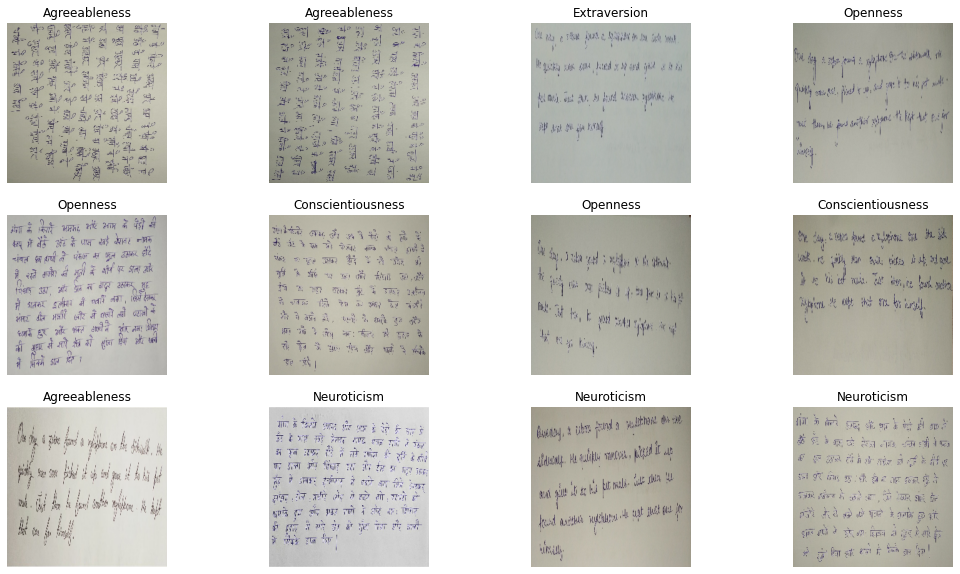

In [ ]:
plt.figure(figsize=(18, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")

In [ ]:
221-32*6

29

In [ ]:
train_ds = dataset.take(6)

In [ ]:
len(train_ds)

6

In [ ]:
test_ds=dataset.skip(6)

In [ ]:
len(test_ds)

1

### **Building the Model**

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(5,activation="softmax"),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
history=model.fit(
    train_ds,
    batch_size=32,
    epochs=30,
)

Epoch 1/30
6/6 [==============================] - 3s 77ms/step - loss: 1.5246 - accuracy: 0.3802
Epoch 2/30
6/6 [==============================] - 3s 73ms/step - loss: 1.5186 - accuracy: 0.4323
Epoch 3/30
6/6 [==============================] - 3s 73ms/step - loss: 1.5333 - accuracy: 0.3958
Epoch 4/30
6/6 [==============================] - 4s 82ms/step - loss: 1.4905 - accuracy: 0.4115
Epoch 5/30
6/6 [==============================] - 4s 72ms/step - loss: 1.4756 - accuracy: 0.3490
Epoch 6/30
6/6 [==============================] - 4s 74ms/step - loss: 1.4364 - accuracy: 0.4219
Epoch 7/30
6/6 [==============================] - 3s 77ms/step - loss: 1.4280 - accuracy: 0.4375
Epoch 8/30
6/6 [==============================] - 3s 74ms/step - loss: 1.4553 - accuracy: 0.4167
Epoch 9/30
6/6 [==============================] - 3s 78ms/step - loss: 1.4355 - accuracy: 0.4167
Epoch 10/30
6/6 [==============================] - 8s 75ms/step - loss: 1.4347 - accuracy: 0.4271
Epoch 11/30
6/6 [============

In [ ]:
model.evaluate(test_ds)

1/1 [==============================] - 3s 3s/step - loss: 1.4178 - accuracy: 0.3448


[1.4178121089935303, 0.3448275923728943]

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


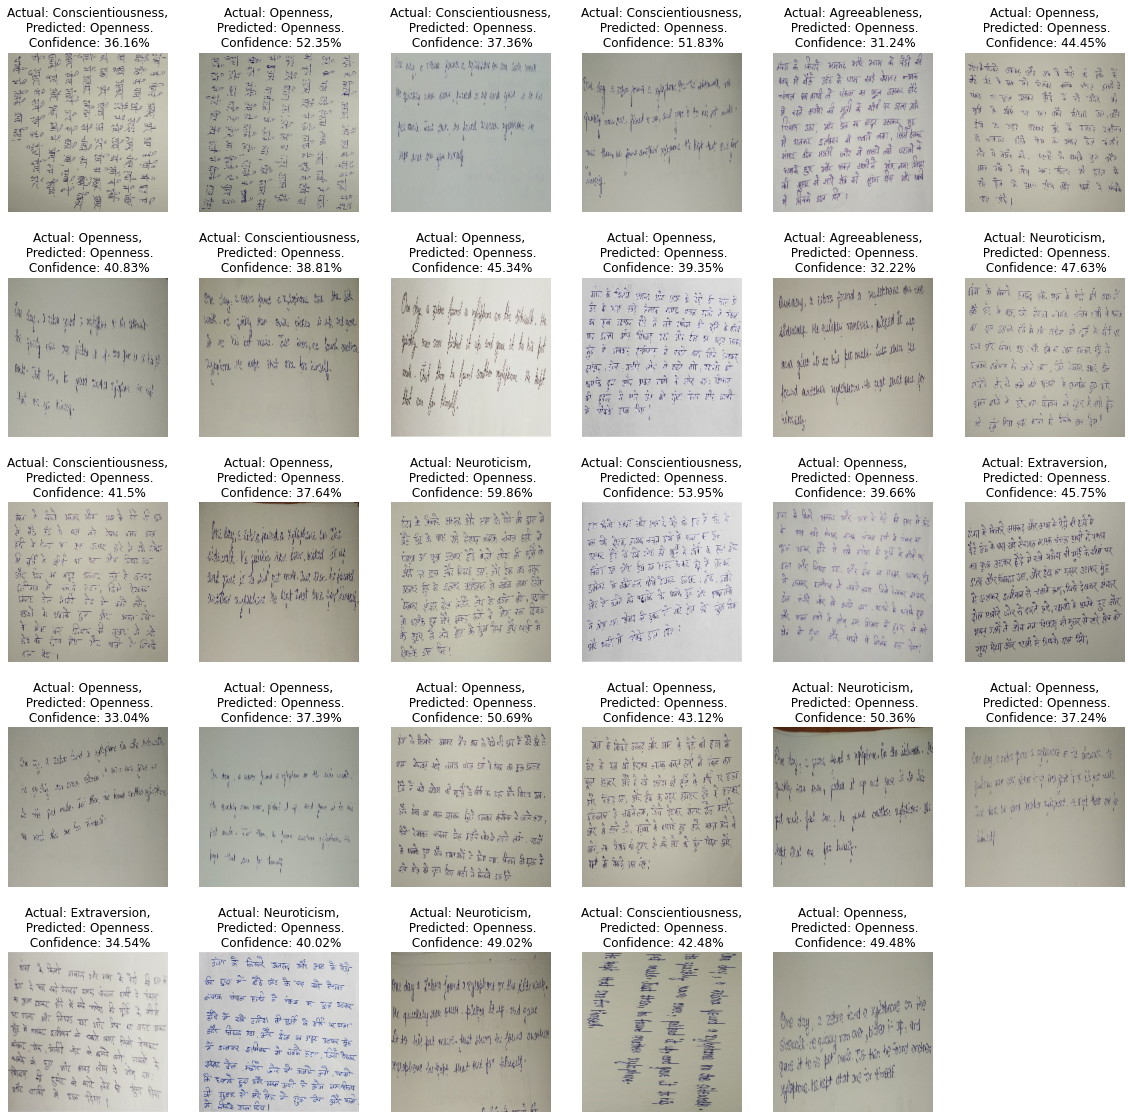

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds:
    for i in range(29):
        ax = plt.subplot(5,6, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break